In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("~/Desktop/diabetes_data_preprocessed_original.csv")

df.shape
df.info()

df['readmitted'] = df['readmitted'].replace('>30', 2)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91023 entries, 0 to 91022
Data columns (total 43 columns):
Unnamed: 0                  91023 non-null int64
encounter_id                91023 non-null int64
patient_nbr                 91023 non-null int64
race                        91023 non-null float64
gender                      91023 non-null int64
age                         91023 non-null float64
admission_type_id           91023 non-null int64
discharge_disposition_id    91023 non-null int64
admission_source_id         91023 non-null int64
time_in_hospital            91023 non-null float64
num_medications             91023 non-null float64
diag_1                      91023 non-null float64
diag_2                      91023 non-null float64
diag_3                      91023 non-null float64
number_diagnoses            91023 non-null float64
max_glu_serum               91023 non-null int64
A1Cresult                   91023 non-null int64
metformin                   91023 non-null

In [9]:
feature_set = ['encounter_id',                
'patient_nbr',                 
'race',                        
'gender',                      
'age',                         
'admission_type_id',           
'discharge_disposition_id',    
'admission_source_id',         
'time_in_hospital',            
'num_medications',             
'diag_1',                      
'diag_2',                      
'diag_3',                      
'number_diagnoses',            
'max_glu_serum',               
'A1Cresult',                   
'metformin',                   
'repaglinide',                 
'nateglinide',                 
'chlorpropamide',              
'glimepiride',                 
'acetohexamide',               
'glipizide',                   
'glyburide',                   
'tolbutamide',                 
'pioglitazone',                
'rosiglitazone',               
'acarbose',                    
'miglitol',                    
'troglitazone',                
'tolazamide',                  
'insulin',                     
'glyburide-metformin',         
'glipizide-metformin',         
'glimepiride-pioglitazone',    
'metformin-rosiglitazone',     
'metformin-pioglitazone',      
'change',                      
'diabetesMed',                 
'number_services',             
'num_total_procedures']

the_input = df[feature_set]
the_output = df['readmitted']

from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(the_input, the_output)
train_input_new = pd.DataFrame(train_input_new, columns = list(the_input.columns))

X_train, X_test, Y_train, Y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

In [13]:
# RANDOM FOREST

forest = RandomForestClassifier(n_estimators =240, max_depth=80, criterion = "entropy", min_samples_split=10)

#print("Cross Validation Score: ", np.mean(cross_val_score(forest, X_train, Y_train, cv=8)))
forest.fit(X_train, Y_train)

Y_test_predict = forest.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, Y_test_predict))



Accuracy:  0.649495925977075


In [14]:
forest = RandomForestClassifier(n_estimators =240, max_depth=80, criterion = "gini", min_samples_split=10)

#print("Cross Validation Score: ", np.mean(cross_val_score(forest, X_train, Y_train, cv=8)))
forest.fit(X_train, Y_train)

Y_test_predict2 = forest.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, Y_test_predict2))

Accuracy:  0.6511186300234775


In [ ]:
# RANDOM FOREST TOP FEATURES DIAGRAM

feature_names = X_train.columns
feature_imports = forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Random Forest -- Top 10 Important Features')
plt.show()

NameError: name 'X_train' is not defined

In [10]:
K3 = [150,200,250,300,350,400] # Or something else# #
A2 = [40,60,80,100] # Or something else 
temp4 = np.zeros((len(K3),len(A2)))
temp4_tr = np.zeros((len(K3),len(A2)))
cross_auc = np.zeros((len(K3),len(A2)))
for i,k in enumerate(K3):
    for j,a in enumerate(A2):
        
        forest = RandomForestClassifier(n_estimators = k, max_depth=a, criterion = "gini", 
                                        min_samples_split=2)
        forest.fit(X_train, Y_train)
        Y_test_predict = forest.predict(X_test)
        temp4[i][j]=accuracy_score(Y_test, Y_test_predict)
        Y_train_predict = forest.predict(X_train)
        temp4_tr[i][j]=accuracy_score(Y_train, Y_train_predict)
        cross_auc[i][j] = np.mean(cross_val_score(forest, X_train, Y_train, cv=8))
        print(temp4[i][j],cross_auc[i][j],temp4_tr[i][j])

0.6544330893522994 0.646653084477849 1.0
0.6586797403673526 0.648232666074634 1.0
0.6535008976660682 0.6472659767817955 1.0
0.6560557933987018 0.647067459246978 1.0
0.6556414859825991 0.6486469699149288 1.0
0.6561938958707361 0.6485606779222872 1.0
0.6571606131749759 0.648094542142484 1.0
0.6582999585692584 0.6489404811776163 1.0
0.6552271785664964 0.6493979187975876 1.0
0.6591285734014639 0.6487419105962144 1.0
0.6559867421626847 0.648741906424027 1.0
0.6577475486811214 0.6488196361488988 1.0
0.6576439718270957 0.6496310096303226 1.0
0.6565046264328132 0.6500884591706416 1.0
0.6571260875569672 0.649630961355351 1.0
0.6560903190167104 0.6492943181001503 1.0


In [ ]:
K3 = [150,200,250,300,350,400] # Or something else# #
A2 = [40,60,80,100] # Or something else 
tryd = np.zeros((len(K3),len(A2)))
for i,k in enumerate(K3):
    for j,a in enumerate(A2):
        tryd[i][j]=i*j
print(tryd)       

In [ ]:
K3 = [150,200,250,300,350,400] # Or something else# #
A2 = [40,60,80,100] # Or something else 
AA=list(A2)
KK=list(K3)
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(temp4, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(AA) 
ax.set_yticks(np.arange(0, len(temp4), 1)) 
ax.set_xticks(np.arange(0, 6, 1)) 
ax.set_yticklabels(KK)
plt.grid()
plt.ylabel('N_estimator')
plt.xlabel("Max_depth")
plt.title("Accuracy of RandomForest subjects to N_estimator and Max_depth")
plt.show()

NameError: name 'A2' is not defined

In [16]:
M = [2,3,4,5] # Or something else# #
L = [1,2,3,4,5] # Or something else 
te1 = np.zeros((len(M),len(L)))
tr1=np.zeros((len(M),len(L)))
cross_auc2 = np.zeros((len(M),len(L)))
for i,k in enumerate(M):
    for j,a in enumerate(L):
       
        forest = RandomForestClassifier(n_estimators = 240, max_depth=80, criterion = "gini",  
                                        min_samples_split=k,min_samples_leaf=a)
        forest.fit(X_train, Y_train)
        Y_test_predict = forest.predict(X_test)                                              
        Y_train_predict = forest.predict(X_train)
        cross_auc2[i][j] = np.mean(cross_val_score(forest, X_train, Y_train, cv=8))
        te1[i][j]=accuracy_score(Y_test, Y_test_predict)
        tr1[i][j]=accuracy_score(Y_train,Y_train_predict)
        print(te1[i][j],cross_auc2[i][j],tr1[i][j])

0.656746305758873 0.6498985402588763 1.0
0.6547438199143765 0.646385502594813 0.9833498770014242
0.6514984118215716 0.6442880784504333 0.9340382374519874
0.6488399392349123 0.6414569765758689 0.8882568728151569
0.6461124154122359 0.6401363281754513 0.8471796642354668
0.6574368181190443 0.6488109958041359 0.9999827370419921
0.652879436541914 0.6464632132478859 0.9834189288334556
0.6519127192376744 0.6444175447488223 0.9344784428811876
0.6477005938406297 0.6423287412783107 0.8859177420050925
0.6472517608065185 0.6404470873467907 0.8480514436148634
0.6561938958707361 0.6491475997209218 0.999292218721678
0.6540187819361967 0.6457727104215564 0.9834016658754478
0.6514984118215716 0.643519865567822 0.9347201242932976
0.6491161441789808 0.641448343382475 0.8861421604591947
0.6462850435022787 0.6400845677601689 0.8478270251607612
0.6557450628366248 0.6467394456099393 0.9960726770532131
0.6539497307001796 0.6466445049268428 0.9752190237797247
0.6514984118215716 0.6432091469249404 0.933451296879

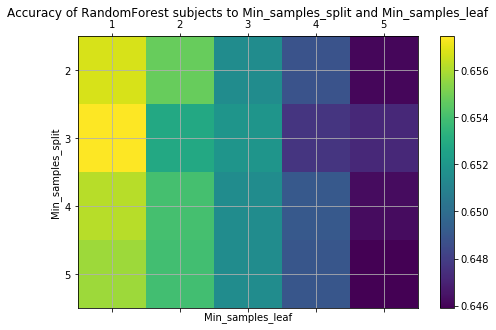

In [25]:
AA=list(L)
KK=list(M)
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(te1, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(AA) 
ax.set_yticks(np.arange(0, 4, 1)) 
ax.set_xticks(np.arange(0, 5, 1)) 
ax.set_yticklabels(KK)
plt.grid()
plt.ylabel('Min_samples_split')
plt.xlabel("Min_samples_leaf")
plt.title("Accuracy of RandomForest subjects to Min_samples_split and Min_samples_leaf")
plt.show()

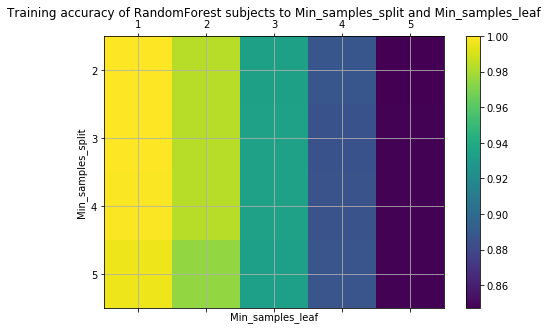

In [27]:
AA=list(L)
KK=list(M)
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr1, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(AA) 
ax.set_yticks(np.arange(0, 4, 1)) 
ax.set_xticks(np.arange(0, 5, 1)) 
ax.set_yticklabels(KK)
plt.grid()
plt.ylabel('Min_samples_split')
plt.xlabel("Min_samples_leaf")
plt.title("Training accuracy of RandomForest subjects to Min_samples_split and Min_samples_leaf")
plt.show()

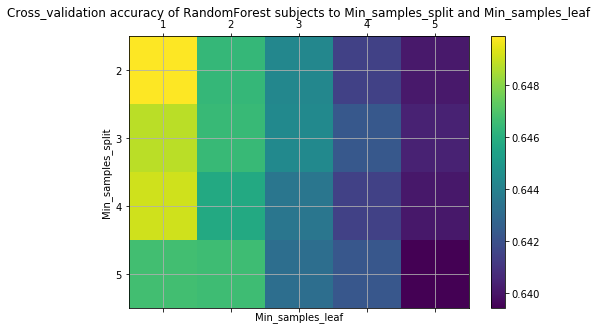

In [29]:
AA=list(L)
KK=list(M)
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(cross_auc2, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(AA) 
ax.set_yticks(np.arange(0, 4, 1)) 
ax.set_xticks(np.arange(0, 5, 1)) 
ax.set_yticklabels(KK)
plt.grid()
plt.ylabel('Min_samples_split')
plt.xlabel("Min_samples_leaf")
plt.title("Cross_validation accuracy of RandomForest subjects to Min_samples_split and Min_samples_leaf")
plt.show()